In [1]:
import mne                                                              # Librería de python para explorar, visualizar,
mne.set_log_level('WARNING')                                            # y analizar datos neurofisiológicos humanos.
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas

import a_funciones as a_fun                                             # Funciones Alex

xlabel = 'Muestra'                                                      # Abscisas
ylabel = 'Amplitud (uV)'                                                # Ordenadas

#### t_flash  
Esta señal contiene los puntos de muestra donde comienza cada parpadeo: (identificación del punto de muestra, duración, estimulación, hit/nohit).  
*El experimento completo dura alrededor de 1400 s. Esto produce una secuencia de EEG que contiene 4200 secciones marcadas, de las cuales 3500 se etiquetan como verdaderas y las 700 restantes como falsas.*  
Esta información de las secciones marcadas y las etiquetas verdaderas y falsas se obtienen de ésta señal.  
*t_flash* Se encuentran específicamente dentro del archivo, accesando al array *t_flash = mat['data'][0][0][4]*.  

Mas info: [*P300-Dataset. Kaggle.*](https://www.kaggle.com/datasets/rramele/p300samplingdataset)

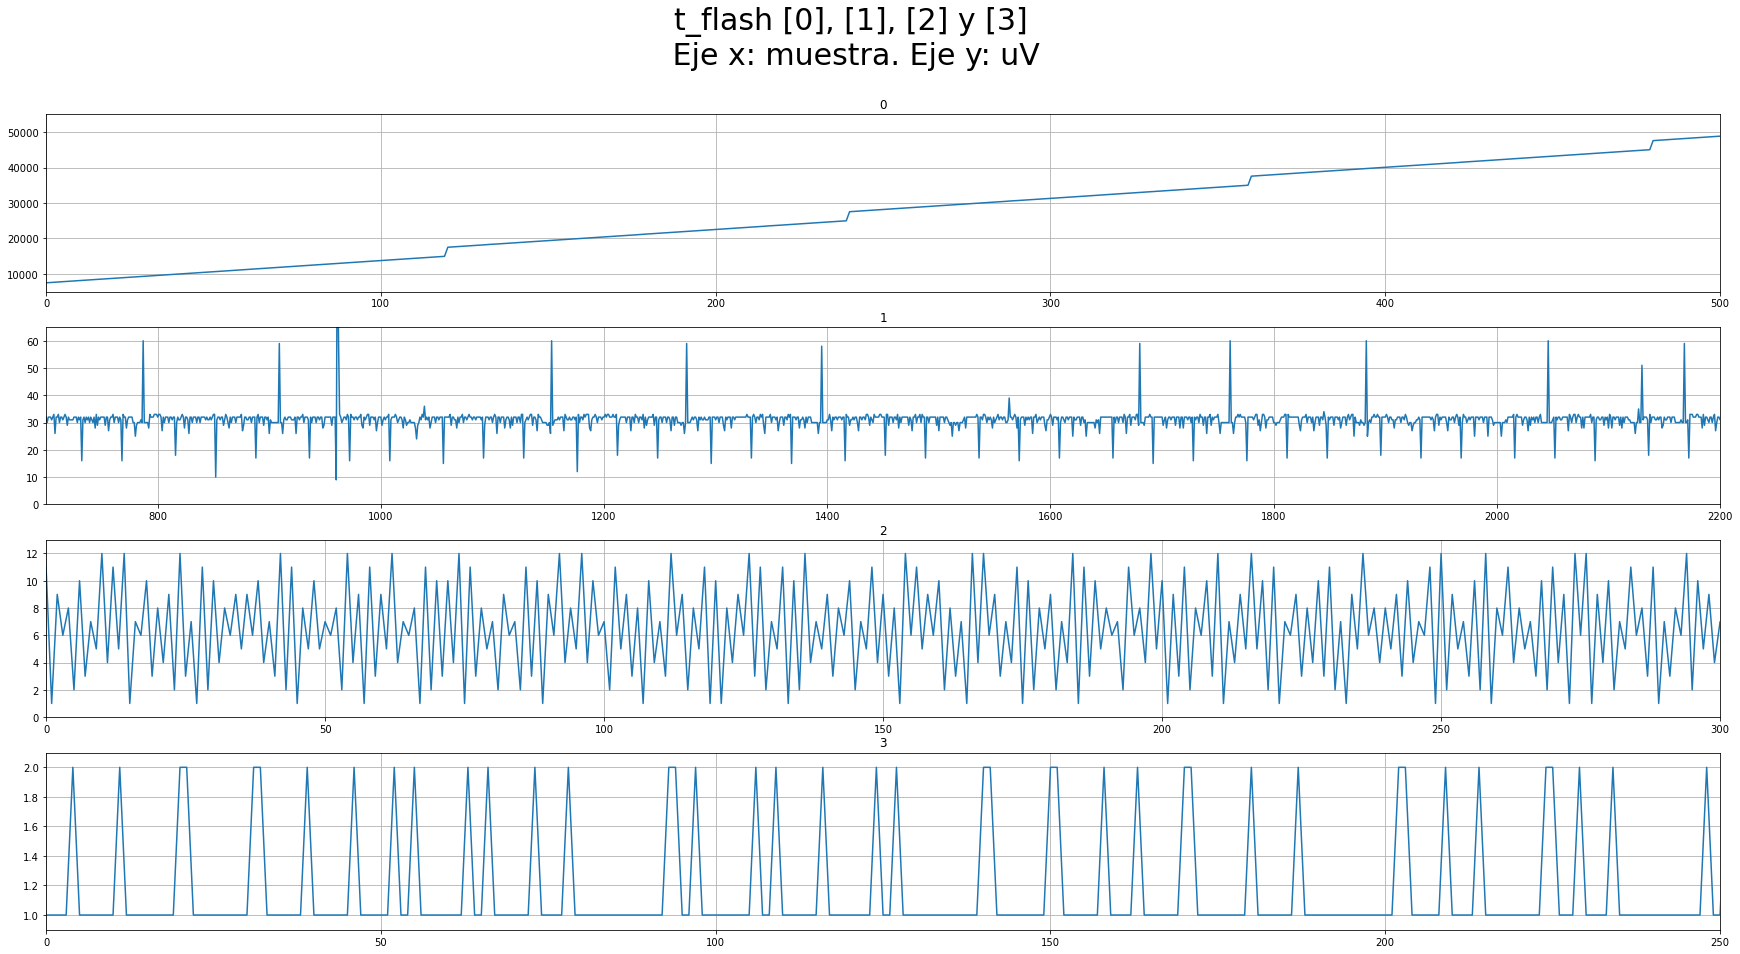

In [21]:
mat = scipy.io.loadmat('./dataset/p300-subject-25.mat')    
t_flash = mat['data'][0][0][4]
df_t_flash = a_fun.to_df(t_flash)

xlim_general=([-50,4250])
ylim_general=([0,12.5])
eje_x_sample=df_t_flash['sample']
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, ncols=1,figsize=(30,15))
fig.suptitle("t_flash [0], [1], [2] y [3] \n Eje x: muestra. Eje y: uV ", fontsize=30)

ax0.plot(eje_x_sample, df_t_flash[0]) #, label='BLABLABLA') 
ax0.set_xlim([0,500]), ax0.set_ylim([5000,55000]), ax0.set_title(df_t_flash.columns[0]), ax0.grid() #plt.xlim([0,500]), plt.ylim([0,60000])

ax1.plot(eje_x_sample, df_t_flash[1], label='1')
ax1.set_xlim([700,2200]), ax1.set_ylim([0,65]), ax1.set_title(df_t_flash.columns[1]), ax1.grid() #plt.xlim([0,1100]), plt.ylim([0,120])

ax2.plot(eje_x_sample, df_t_flash.iloc[:,2], label='2')
ax2.set_xlim([0,300]), ax2.set_ylim([0,13]), ax2.set_title(df_t_flash.columns[2]), ax2.grid() #plt.xlim([0,200]), plt.ylim([0,13])

ax3.plot(eje_x_sample, df_t_flash.iloc[:,3], label='3')
ax3.set_xlim([0,250]), ax3.set_ylim([0.9,2.1]), ax3.set_title(df_t_flash.columns[3]), ax3.grid() #plt.xlim([0,250]), plt.ylim([0.9,2.1])

plt.savefig("./a_images/t_flash.jpg")
plt.show()

In [36]:
print("-----------------------------------------")   
print("                t_flash:")   
print("-----------------------------------------")   
print("Describe general : \n ", df_t_flash.describe())  
print("-----------------------------------------")  
print("Describe [3] : \n ", df_t_flash[3].describe())  
print("-----------------------------------------")   
print("Muestras válidas y falsas : \n ", df_t_flash[3].value_counts())                                      #Informativo
print("-----------------------------------------")

-----------------------------------------
                t_flash:
-----------------------------------------
Describe general : 
                     0            1            2            3       sample
count    4200.000000  4200.000000  4200.000000  4200.000000  4200.000000
mean   181668.002143    30.970238     6.500000     1.166667  2099.500000
std    101288.416332     3.861229     3.452464     0.372722  1212.579894
min      7499.000000     9.000000     1.000000     1.000000     0.000000
25%     93340.750000    30.000000     3.750000     1.000000  1049.750000
50%    181672.500000    32.000000     6.500000     1.000000  2099.500000
75%    269993.000000    32.000000     9.250000     1.000000  3149.250000
max    355828.000000   111.000000    12.000000     2.000000  4199.000000
-----------------------------------------
Describe [3] : 
  count    4200.000000
mean        1.166667
std         0.372722
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max  